In [54]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [55]:
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [56]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [57]:
df["language"].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [58]:
df.isna().sum().sum()

0

In [59]:
df.duplicated().sum()

141

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21859 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      21859 non-null  object
 1   language  21859 non-null  object
dtypes: object(2)
memory usage: 512.3+ KB


In [62]:
df["Text"][10]


'kemunculan pertamanya adalah ketika mencium kakak kelasnya kyoko sejak yuuki meminta agar sakura merahasiakan hal tersebutlah keduanya menjadi akrab yuuki pun akhirnya menyukai sakura sayangnya tidak disadari oleh sakura dan hanya aiko yang tahu karena takut dibenci sakura yuuki akhirnya menganggap sakura "sahabat spesial"'

In [63]:
df["language"][10]

'Indonesian'

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

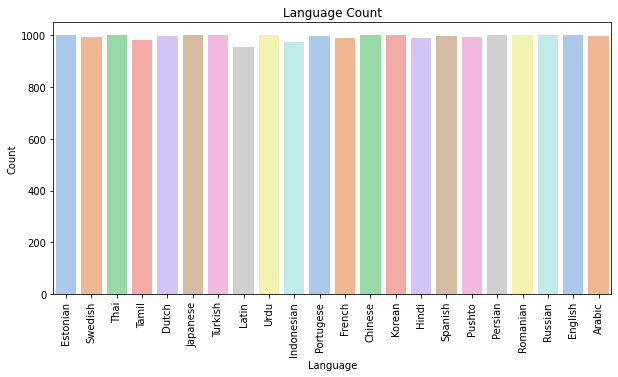

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df["language"].value_counts())
fig = plt.figure(figsize=(10, 5))
g1 = sns.countplot(df.language,palette="pastel");
g1.set_title("Language Count")
g1.set_ylabel("Count")
g1.set_xlabel("Language")
plt.xticks(rotation=90)


In [65]:
df.tail()

,Text,language
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese
21999,aprilie sonda spațială messenger a nasa și-a ...,Romanian


In [66]:
x = df["Text"]
y = df["language"]

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [68]:
count_vect = CountVectorizer()


In [69]:
X = count_vect.fit_transform(x)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

In [71]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [72]:
model.score(X_test, y_test)

0.9546714721375104

In [73]:
y_pred = model.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy score: ", ac)

Accuracy score:  0.9546714721375104


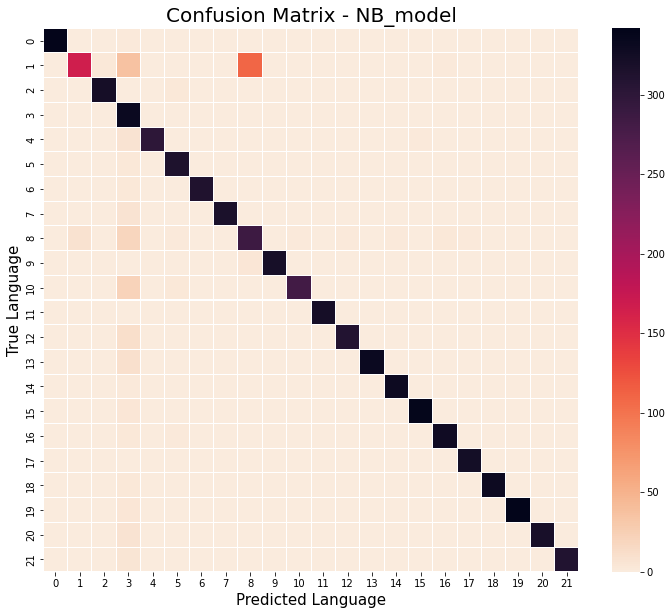

In [75]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - NB_model', Fontsize=20)
sns.heatmap(cm, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()